In [19]:
import os, sys
from src import settings
import pandas as pd
import matplotlib.pyplot as plt
from src.utils import fileio

from src import settings
from src.utils import fileio

TREATMENTS = ['CS_10D', 'Cs_5DIZ', 'CsCh']

for TREATMENT in TREATMENTS:
    INPUT_DIR = os.path.join(settings.OUTPUT_DIR, "2_0_find_interactions", TREATMENT)
    # SCRIPT_OUTPUT = os.path.join(settings.OUTPUT_DIR, "2_2_create_total_graph", TREATMENT)
    # os.makedirs(SCRIPT_OUTPUT, exist_ok=True)
    config = fileio.get_config(settings.CONFIG_NAME)
    treatment = fileio.load_files_from_folder(INPUT_DIR)

    count = []
    duration = []
    for group_name, group_path in treatment.items():
        df = pd.read_csv(group_path, index_col=0)
        df = df.sort_values(["start_of_interaction", "end_of_interaction"])
        df = df[['node_1', 'node_2', 'start_of_interaction', 'end_of_interaction']]

        time  active_interactions
0          0                    1
1          0                    2
2          0                    3
3          0                    4
4          0                    5
...      ...                  ...
10293  28770                    0
10294  28780                    1
10295  28780                    2
10296  28799                    1
10297  28799                    0

[10298 rows x 2 columns]


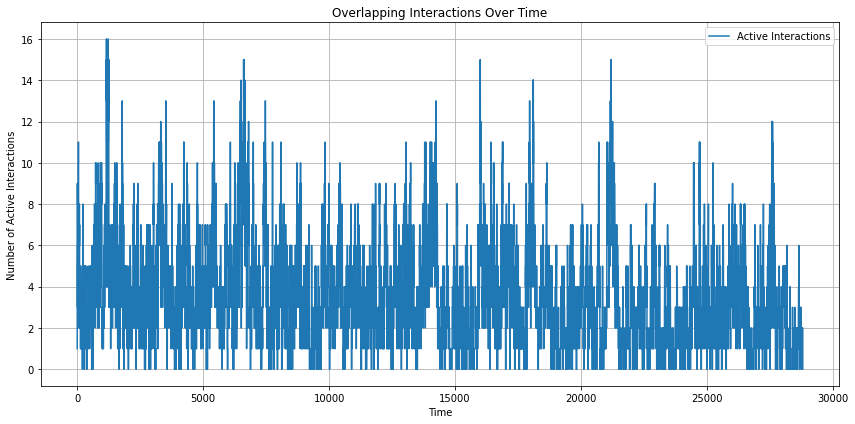

In [22]:
import pandas as pd

start_events = df[['start_of_interaction']].copy()
start_events.columns = ['time']
start_events['change'] = 1

end_events = df[['end_of_interaction']].copy()
end_events.columns = ['time']
end_events['change'] = -1

events = pd.concat([start_events, end_events])
events = events.sort_values('time').reset_index(drop=True)
events['active_interactions'] = events['change'].cumsum()
print(events[['time', 'active_interactions']])

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.step(events['time'], events['active_interactions'], where='post', label='Active Interactions')
plt.xlabel('Time')
plt.ylabel('Number of Active Interactions')
plt.title('Overlapping Interactions Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
